In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128, 128))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((128, 128))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/Cells128",Cells)
np.save("/content/drive/My Drive/Colab Notebooks/labels128",labels)

In [2]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells128.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels128.npy")

In [ ]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [ ]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model = Sequential()
inputShape = (128, 128, 3)
 
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(MaxPooling2D(pool_size=2))
model.add(MaxPooling2D(pool_size=2))
 
model.add(Flatten())
model.add(Dense(4000))
model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4000)             

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(x = x_train, y = y_train,
                    epochs = 20, validation_data = (x_test,y_test),
                    verbose = 1)

Train on 24803 samples, validate on 2755 samples
Epoch 1/20
24803/24803 [==============================] - 20s 816us/step - loss: 0.9360 - accuracy: 0.7941 - val_loss: 0.2665 - val_accuracy: 0.9154
Epoch 2/20
24803/24803 [==============================] - 20s 807us/step - loss: 0.3194 - accuracy: 0.9052 - val_loss: 0.2519 - val_accuracy: 0.9241
Epoch 3/20
24803/24803 [==============================] - 20s 809us/step - loss: 0.3130 - accuracy: 0.9093 - val_loss: 0.3322 - val_accuracy: 0.9067
Epoch 4/20
24803/24803 [==============================] - 20s 811us/step - loss: 0.3069 - accuracy: 0.9092 - val_loss: 0.3042 - val_accuracy: 0.9198
Epoch 5/20
24803/24803 [==============================] - 20s 808us/step - loss: 0.3091 - accuracy: 0.9095 - val_loss: 0.2845 - val_accuracy: 0.8995
Epoch 6/20
24803/24803 [==============================] - 20s 804us/step - loss: 0.3062 - accuracy: 0.9126 - val_loss: 0.2883 - val_accuracy: 0.8868
Epoch 7/20
24803/24803 [==============================] -

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Shallownet128/ShallowNet128.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

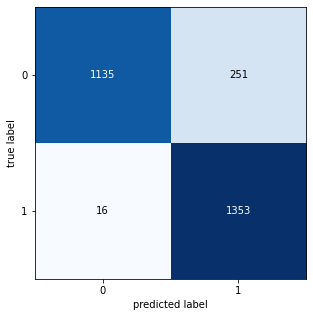

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()